In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


In [2]:
import warnings
warnings.simplefilter("ignore")

Goal for this kernel: Handle preprocessing steps,learning Naive Bayes classifier and its variants, nearest neighbour, support vector machines and random forest. 

In [3]:
crises = pd.read_csv("../input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv")

In [4]:
crises.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


Columns: 
**case** A number which denotes a specific country

**cc3** A three letter country code

**country** The name of the country

**year** The year of the observation

**systemic_crisis** "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.

**exch_usd** The exchange rate of the country vis-a-vis the USD

**domestic_debt_in_default** "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year

**sovereign_external_debt_default** "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year

**gdp_weighted_default** The total debt in default vis-a-vis the GDP

**inflation_annual_cpi** The annual CPI Inflation rate

**independence** "0" means "no independence" and "1" means "independence"

**currency_crises** "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year

**inflation_crises** "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year

**banking_crisis** "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

In [5]:
crises.shape

(1059, 14)

In [6]:
crises.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


Kumar,D.(2018,Dec 25).Introduction to Data Preprocessing in Machine Learning. Retrieved from: https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

Data processing Steps:
* Handling Null Values
* Standardization
* Handling Categorical Variables
* One-Hot Encoding
* Multicollinearity

In [7]:
#Checking for null values
crises[crises.isna().any(axis = 1)]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis


In [8]:
#Checking for null values
crises.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [9]:
#Checking correlation between factors to systemic_crisis
crises.drop(['case'],axis = 1).corr()


,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
year,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376
inflation_crises,0.098630,0.172562,-0.063783,0.224429,0.187930,0.017630,0.080060,-0.022548,0.393376,1.000000


In [10]:
crises.iloc[:,[3,5,6,7,8,9,10,11,12]].apply(lambda x : x.corr(crises['systemic_crisis']))   

year                               0.197450
exch_usd                           0.202687
domestic_debt_in_default           0.122158
sovereign_external_debt_default    0.249850
gdp_weighted_default               0.005274
inflation_annual_cpi               0.106452
independence                       0.147083
currency_crises                    0.112751
inflation_crises                   0.172562
dtype: float64

The 3 highest correlation with systemic_crisis are sovereign_external_debt_default(0.249850),exch_usd(0.202687),year(0.197450).


In [11]:
#Separating the features and target
x = crises.drop(['case','cc3','country','systemic_crisis'],axis = 1)    #drop irrelevant columns
y = crises['systemic_crisis']#crises.loc[crises['systemic_crisis']]

In [12]:
#Explanatory variables: All variables excluding case,cc3,country,systemic_crisis columns
x

,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1870,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1871,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1872,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1873,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1874,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...
1054,2009,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,2010,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,2011,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,2012,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [13]:
#Dependent variable: systemic_crisis
y

0       1
1       0
2       0
3       0
4       0
       ..
1054    1
1055    0
1056    0
1057    0
1058    0
Name: systemic_crisis, Length: 1059, dtype: int64

In [14]:
#Convert banking_crisis column into encoding using one hot encoding
#Two different ways of creating dummy variables
#x = pd.get_dummies(x)  #Create two column for banking_crisis(one for crisis, another for no_crisis)
x = pd.get_dummies(x,drop_first = True) #Only one column for banking_crisis(0 = crisis, 1 = no_crisis)
x

,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_no_crisis
0,1870,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1871,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1872,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1873,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1874,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1054,2009,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,2010,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,2011,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,2012,361.900000,1,1,0.0,3.720000,1,0,0,1


pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

drop_first = Whether to get k-1 dummies out of k categorical levels by removing the first level. 


In [15]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_transformed = scaler.fit_transform(x)    #result as a numpy array
x = pd.DataFrame(x_transformed, index = x.index, columns = x.columns )    #keep as a dataframe
x

,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_no_crisis
0,-2.917150,-0.386713,-0.203219,-0.424973,-0.147006,-0.030863,-1.862352,-0.378058,-0.385474,-3.204053
1,-2.887313,-0.386708,-0.203219,-0.424973,-0.147006,-0.030848,-1.862352,-0.378058,-0.385474,0.312105
2,-2.857475,-0.386712,-0.203219,-0.424973,-0.147006,-0.030874,-1.862352,-0.378058,-0.385474,0.312105
3,-2.827638,-0.386718,-0.203219,-0.424973,-0.147006,-0.030852,-1.862352,-0.378058,-0.385474,0.312105
4,-2.797800,-0.386721,-0.203219,-0.424973,-0.147006,-0.030874,-1.862352,-0.378058,-0.385474,0.312105
...,...,...,...,...,...,...,...,...,...,...
1054,1.230271,2.797088,4.920801,2.353091,-0.147006,-0.030880,0.536955,2.481682,-0.385474,-3.204053
1055,1.260109,3.007099,4.920801,2.353091,-0.147006,-0.030864,0.536955,-0.378058,-0.385474,0.312105
1056,1.289946,2.860809,4.920801,2.353091,-0.147006,-0.030861,0.536955,-0.378058,-0.385474,0.312105
1057,1.319784,2.860809,4.920801,2.353091,-0.147006,-0.030863,0.536955,-0.378058,-0.385474,0.312105


Reference:https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer

StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression.

Reference:https://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn

1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

**Logistic Regression**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy = " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

[[236   6]
 [  3  20]]
Accuracy = 0.9660377358490566


In [19]:
print(logReg.coef_)
print(x.columns)
for i in range(len(logReg.coef_[0])):    
    print("Coeeficient of " + x.columns[i] + " : " + str(logReg.coef_[0][i]))

[[ 0.14817908  0.06060015 -0.40492794  0.68753023 -0.41166365  0.15455374
  -0.02843564 -0.01329999 -0.17867466 -1.81371988]]
Index(['year', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises', 'banking_crisis_no_crisis'],
      dtype='object')
Coeeficient of year : 0.14817908332172108
Coeeficient of exch_usd : 0.060600148677810585
Coeeficient of domestic_debt_in_default : -0.40492793562151097
Coeeficient of sovereign_external_debt_default : 0.6875302316304519
Coeeficient of gdp_weighted_default : -0.4116636547353412
Coeeficient of inflation_annual_cpi : 0.15455373519266855
Coeeficient of independence : -0.02843564004061104
Coeeficient of currency_crises : -0.013299991401185773
Coeeficient of inflation_crises : -0.1786746630613695
Coeeficient of banking_crisis_no_crisis : -1.8137198774127834


In [20]:
import math
#Convert log-odds into odds
odds = []
for i in range(len(logReg.coef_[0])):
    odds.append(math.exp(logReg.coef_[0][i]))
#print(odds)

#Convert odds into probability
probs = []
for i in range(len(odds)):
    probs.append(odds[i]/(1+odds[i]))
#print(probs)
for i in range(len(probs)):    
    print("Coeeficient of " + x.columns[i] + " : " + str(probs[i]))

Coeeficient of year : 0.5369771365362689
Coeeficient of exch_usd : 0.5151454024828523
Coeeficient of domestic_debt_in_default : 0.4001289283193712
Coeeficient of sovereign_external_debt_default : 0.6654172894636199
Coeeficient of gdp_weighted_default : 0.39851327512306445
Coeeficient of inflation_annual_cpi : 0.5385617045130002
Coeeficient of independence : 0.4928915689646548
Coeeficient of currency_crises : 0.4966750511620124
Coeeficient of inflation_crises : 0.4554497919820151
Coeeficient of banking_crisis_no_crisis : 0.14018914561506676


Other methods: naive bayes, nearest neighbour, svm, decision trees, boosted trees, random forest, neural network

**Naive Bayes**
https://scikit-learn.org/stable/modules/naive_bayes.html

*GaussianNB* 

*MultinomialNB* 

*ComplementNB*

*BernoulliNB*

*CategoricalNB*

References: 

Implementing 3 Naive Bayes classifiers in scikit-learn. (2018, May 7). Retrieved from: https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/

Das,A.(2018,Sep 25). A comprehensive Naive Bayes Tutorial using scikit-learn. Retrieved from:https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431

Navlani,A. (2018,Dec 4). Naive Bayes Classification using Scikit-learn.Retrieved from:https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836882/image_3_ijznzs.png">
* P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h. (Marginal prob)
* P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability. (Marginal prob of other cond)
* P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability. (Get using the formula above)
* P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability. (Conditional prob)

Multiple features
<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836884/image_5_uhsgzr.png">



In [21]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy of GaussianNB = " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

[[232  10]
 [  3  20]]
Accuracy of GaussianNB = 0.9509433962264151


In [22]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy BernoulliNB = " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

[[235   7]
 [  4  19]]
Accuracy BernoulliNB = 0.9584905660377359


In [23]:
#MultinomialNB
# from sklearn.naive_bayes import MultinomialNB
# mnb = MultinomialNB()
# mnb.fit(X_train,y_train)
# y_pred = mnb.predict(X_test)
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# print("Accuracy MultinomialNB = " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

#ValueError: Input X must be non-negative

In [24]:
#ComplementNB
# from sklearn.naive_bayes import ComplementNB
# cnb = ComplementNB()
# cnb.fit(X_train,y_train)
# y_pred = cnb.predict(X_test)
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# print("Accuracy ComplementNB = " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

#ValueError: Input X must be non-negative

In [25]:
# CategoricalNB
# from sklearn.naive_bayes import CategoricalNB
# cnb = CategoricalNB()
# cnb.fit(X_train,y_train)
# y_pred = cnb.predict(X_test)
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# print("Accuracy CategoricalNB = " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

#ImportError: cannot import name 'CategoricalNB'

Nearest neighbour

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy knn 5 neighbor : " + str(metrics.accuracy_score(y_test,y_pred)))    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)


[[240   2]
 [  3  20]]
Accuracy knn 5 neighbor : 0.9811320754716981


In [27]:
accuracy_result = []
for i in range(5,30,5):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_result.append(metrics.accuracy_score(y_test,y_pred))
print(accuracy_result)


[0.9811320754716981, 0.969811320754717, 0.969811320754717, 0.9547169811320755, 0.9547169811320755]


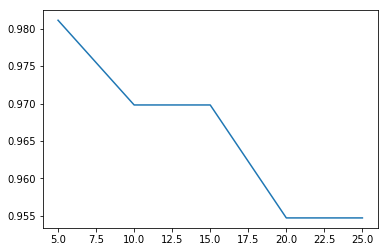

In [28]:
import matplotlib.pyplot as plt
plt.plot([5,10,15,20,25],accuracy_result)

Support vector machine

Reference: https://scikit-learn.org/stable/modules/svm.html
The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. 

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer, as shown by Fan et al. (2008)

Reference: 

Navlani,A.(2019,Dec 28).Support Vector Machines with Scikit-learn.Retrieved from:https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png">
**Support Vectors**
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane.

SVM uses a kernel trick to transform the input space to a higher dimensional if some problems cannot be solved in a linear hyperplane. Now can separate the points using linear separation. The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

**Parameters:****
* *Kernel:* The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
* *Regularization: *Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane. (The strength of the regularization is inversely proportional to C)
* *Gamma:* A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [29]:
from sklearn import svm
#linear kernel
linsvm = svm.SVC(kernel = "linear")
linsvm.fit(X_train,y_train)
y_pred = linsvm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy linear kernel svm : " + str(metrics.accuracy_score(y_test,y_pred)))

[[236   6]
 [  3  20]]
Accuracy linear kernel svm : 0.9660377358490566


In [30]:
#Different kernels: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#rbf kernel
rbfsvm = svm.SVC(kernel = "rbf")
rbfsvm.fit(X_train,y_train)
y_pred = rbfsvm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy rbf kernel svm : " + str(metrics.accuracy_score(y_test,y_pred)))

[[237   5]
 [  4  19]]
Accuracy rbf kernel svm : 0.9660377358490566


In [31]:
#Different kernels: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#poly kernel
polysvm = svm.SVC(kernel = "poly")
polysvm.fit(X_train,y_train)
y_pred = polysvm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy poly kernel svm : " + str(metrics.accuracy_score(y_test,y_pred)))

[[240   2]
 [  4  19]]
Accuracy poly kernel svm : 0.9773584905660377


In [32]:
#sigmoid kernel
sigsvm = svm.SVC(kernel = "sigmoid")
sigsvm.fit(X_train,y_train)
y_pred = sigsvm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy sigmoid kernel svm : " + str(metrics.accuracy_score(y_test,y_pred)))

[[240   2]
 [ 11  12]]
Accuracy sigmoid kernel svm : 0.9509433962264151


In [33]:
# #precomputed kernel
# presvm = svm.SVC(kernel = "precomputed")
# presvm.fit(X_train,y_train)
# y_pred = presvm.predict(X_test)
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# print("Accuracy precomputed kernel svm : " + str(metrics.accuracy_score(y_test,y_pred)))

#ValueError: X.shape[0] should be equal to X.shape[1]

Accuracy poly kernel svm with C value = 0.01 : 0.9320754716981132
Accuracy poly kernel svm with C value = 0.2 : 0.9660377358490566
Accuracy poly kernel svm with C value = 0.4 : 0.9735849056603774
Accuracy poly kernel svm with C value = 0.6 : 0.9811320754716981
Accuracy poly kernel svm with C value = 0.8 : 0.9773584905660377
Accuracy poly kernel svm with C value = 1.0 : 0.9773584905660377
Accuracy poly kernel svm with C value = 1.2 : 0.9773584905660377
Accuracy poly kernel svm with C value = 1.4 : 0.9773584905660377
Accuracy poly kernel svm with C value = 1.6 : 0.9773584905660377
Accuracy poly kernel svm with C value = 1.8 : 0.9773584905660377
Accuracy poly kernel svm with C value = 2.0 : 0.9773584905660377
Accuracy poly kernel svm with C value = 2.5 : 0.9773584905660377
Accuracy poly kernel svm with C value = 3.0 : 0.9773584905660377
Accuracy poly kernel svm with C value = 4.0 : 0.9773584905660377
Accuracy poly kernel svm with C value = 5.0 : 0.9773584905660377
Accuracy poly kernel svm

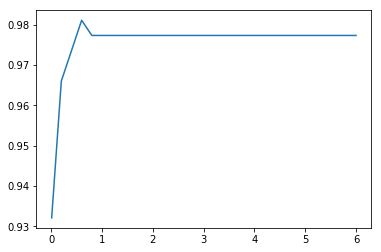

In [34]:
#Regularization parameter: C.Must be positive float.
cValues = [0.01,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0,4.0,5.0,6.0]
results = []
for i in range(len(cValues)):
    #poly kernel
    polysvm = svm.SVC(kernel = "poly", C = cValues[i])
    polysvm.fit(X_train,y_train)
    y_pred = polysvm.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print("Accuracy poly kernel svm with C value = " + str(cValues[i]) + " : "+ str(metrics.accuracy_score(y_test,y_pred)))
    results.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(cValues,results)

Random Forest

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Navlani,A.(2018,May 16). Understanding Random Forests Classifiers in Python. Retrieved from:https://www.datacamp.com/community/tutorials/random-forests-classifier-python

A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy Random Forest : " + str(metrics.accuracy_score(y_test,y_pred)))

[[241   1]
 [  4  19]]
Accuracy Random Forest : 0.9811320754716981


In [36]:
for i in range(len(clf.feature_importances_)):    
    print("Coeeficient of " + x.columns[i] + " : " + str(clf.feature_importances_[i]))


Coeeficient of year : 0.12273222473850778
Coeeficient of exch_usd : 0.13115785604248467
Coeeficient of domestic_debt_in_default : 0.006023784588277152
Coeeficient of sovereign_external_debt_default : 0.027599898528563677
Coeeficient of gdp_weighted_default : 0.007533897493391252
Coeeficient of inflation_annual_cpi : 0.09250274234927693
Coeeficient of independence : 0.0035300486005577017
Coeeficient of currency_crises : 0.010083299538075303
Coeeficient of inflation_crises : 0.011819517616541077
Coeeficient of banking_crisis_no_crisis : 0.5870167305043245
